<a href="https://colab.research.google.com/github/Molten-Ice/Deep-Learning/blob/colab/CycleGAN_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip3 install ipywidgets --user
# !pip3 install kaggle
# !pip3 install torch
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 40.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 84.3 MB/s eta 0:00:00


In [4]:
# !conda install -y torch
# !conda install -y torchvision
# !conda install -y matplotlib

In [5]:
!nvidia-smi

Tue Mar 28 21:03:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB           On | 00000000:05:00.0 Off |                    0 |
| N/A   27C    P0               58W / 400W|      3MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import time

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"number of gpus: {torch.cuda.device_count()}")
# device = "cpu"
print(device)

batch_size = 1

num gpus: 1
cuda:0


In [ ]:
def make_christmas_tree():
    


In [10]:
 #Connecting to kaggle API
import json
import zipfile
kaggle_apikey = {"username":"jamesdavey","key":"a8975caa44cfa08d6f2164f2d5977b6e"}

# base_dir = '/home/azureuser/'
base_dir = "/home/fsuser/"
kaggle_dir = base_dir + '.kaggle'
print("base_dir:", base_dir)
print("kaggle_dir:", kaggle_dir)
if not os.path.exists(kaggle_dir): os.mkdir(kaggle_dir)

with open(kaggle_dir+'/kaggle.json', 'w') as f:
    json.dump(kaggle_apikey, f)

! chmod 600 ~/.kaggle/kaggle.json

# open file at ~/.kaggle/kaggle.json and print it
with open(kaggle_dir+'/kaggle.json', 'r') as f:
    print(f.read())

base_dir: /home/fsuser/
kaggle_dir: /home/fsuser/.kaggle
{"username": "jamesdavey", "key": "a8975caa44cfa08d6f2164f2d5977b6e"}


In [14]:
!mkdir downloaded-data
!ls

CycleGAN_colab.ipynb	 lfw_funneled	    pairs.txt
CycleGAN_combined.ipynb  lfw-funneled.tgz   simpsons-data
CycleGan.ipynb		 lfwpeople.zip	    simpsons-faces.zip
downloaded-data		 pairsDevTest.txt
GAN.ipynb		 pairsDevTrain.txt


In [26]:
base_path = "/home/fsuser/Deep-Learning/"
data_path = base_path+"downloaded-data/"
if not os.path.exists(data_path): os.mkdir(data_path)
!kaggle config set -n path -v {data_path}

- path is now set to: /home/fsuser/Deep-Learning/downloaded-data/


In [27]:
# Download simpsons dataset from kaggle
! kaggle datasets download -d kostastokis/simpsons-faces

#unzip file simpsons-faces.zip
with zipfile.ZipFile(data_path+"datasets/kostastokis/simpsons-faces/simpsons-faces.zip","r") as zip_ref:
    zip_ref.extractall(data_path)



 98%|███████████████████████████████████████▏| 434M/442M [00:05<00:00, 83.3MB/s]
100%|████████████████████████████████████████| 442M/442M [00:05<00:00, 78.5MB/s]


In [41]:
# Download faces dataset from kaggle
! kaggle datasets download -d atulanandjha/lfwpeople

with zipfile.ZipFile(data_path+"datasets/atulanandjha/lfwpeople/lfwpeople.zip","r") as zip_ref:
    zip_ref.extractall(data_path)

import tarfile
tar = tarfile.open(data_path+"lfw-funneled.tgz")
tar.extractall(data_path)
tar.close()

 97%|██████████████████████████████████████▉ | 226M/232M [00:03<00:00, 84.9MB/s]
100%|████████████████████████████████████████| 232M/232M [00:03<00:00, 77.0MB/s]


In [50]:
!ls /home/fsuser/Deep-Learning/downloaded-data/lfw_funneled

Aaron_Eckhart			 JP_Suarez
Aaron_Guiel			 JT_Snow
Aaron_Patterson			 Juan_Antonio_Samaranch
Aaron_Peirsol			 Juan_Carlos
Aaron_Pena			 Juan_Carlos_Ferrero
Aaron_Sorkin			 Juan_Carlos_Morales
Aaron_Tippin			 Juan_Carlos_Ortega
Abba_Eban			 Juanes
Abbas_Kiarostami		 Juan_Fernandez
Abdel_Aziz_Al-Hakim		 Juan_Francisco_Palencia
Abdel_Madi_Shabneh		 Juan_Ignacio_Chela
Abdel_Nasser_Assidi		 Juan_Jose_Lucas
Abdoulaye_Wade			 Juan_Manuel_Marquez
Abdulaziz_Kamilov		 Juan_Pablo_Montoya
Abdullah			 Juan_Roman_Carrasco
Abdullah_Ahmad_Badawi		 Juan_Roman_Riquelme
Abdullah_al-Attiyah		 Juan_Sanchez
Abdullah_Gul			 Juan_Valencia_Osorio
Abdullah_Nasseef		 Judd_Davies
Abdullatif_Sener		 Jude_Law
Abdul_Majeed_Shobokshi		 Judi_Dench
Abdul_Rahman			 Judi_Patton
Abel_Aguilar			 Judith_Nathan
Abel_Pacheco			 Judy_Dean
Abid_Hamid_Mahmud_Al-Tikriti	 Judy_Genshaft
Abner_Martinez			 Judy_Locy
Abraham_Foxman			 Judy_Spreckels
Aby_Har-Even			 Judy_Vassar
Adam_Ant			 Juergen_Braehmer
Adam_Freier			 Juergen_Chrobog

In [37]:
simpsons_path = data_path + 'cropped'
faces_path = data_path + 'lfw_funneled'

In [52]:
names = sorted(os.listdir(data_path+'lfw_funneled'))[:-12]
print("number of people:", len(names), names[:5])

faces_file_paths = []
counter= 0 
for name in names:
    images_in_folder = os.listdir(data_path+'lfw_funneled/'+name)
    faces_file_paths.extend([name+"/"+x for x in images_in_folder[:2]])
    counter += 1
    if counter > 10000: break # Deleted this line to get all the images

print("number of face images:", len(faces_file_paths), faces_file_paths[:5])

simpson_file_paths = sorted(os.listdir(data_path+'cropped'))
print("number of simpsons images:", len(simpson_file_paths), simpson_file_paths[:5])

number of people: 5748 ['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson']
number of face images: 7428 ['AJ_Cook/AJ_Cook_0001.jpg', 'AJ_Lamas/AJ_Lamas_0001.jpg', 'Aaron_Eckhart/Aaron_Eckhart_0001.jpg', 'Aaron_Guiel/Aaron_Guiel_0001.jpg', 'Aaron_Patterson/Aaron_Patterson_0001.jpg']
number of simpsons images: 9877 ['1.png', '10.png', '100.png', '1000.png', '1001.png']


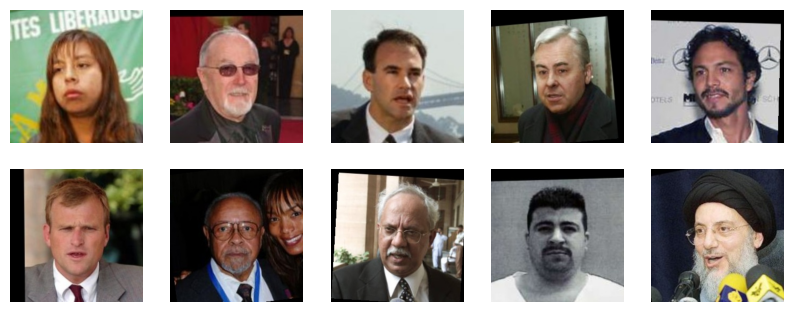

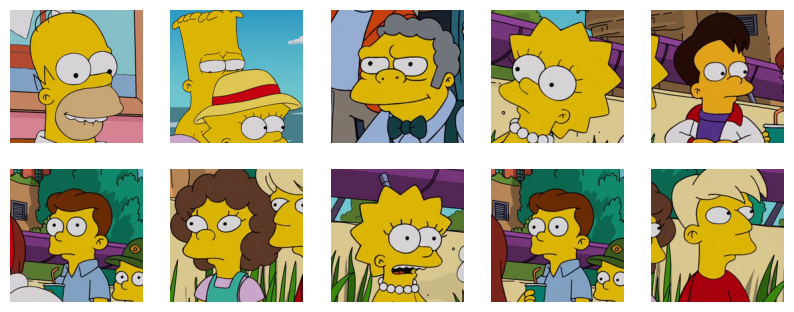

In [53]:
# display 10 faces images
random_indices = np.random.randint(0, len(faces_file_paths), 10)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = plt.imread('lfw_funneled/'+faces_file_paths[random_indices[i]])
    plt.imshow(img)
    plt.axis('off')
plt.show()

# display 10 simpsons images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    img = plt.imread('simpsons-data/cropped/'+simpson_file_paths[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [54]:
#Create traindataloader from simpsons dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, file_paths, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_paths = file_paths
        self.len = len(self.file_paths)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        img = plt.imread(self.root_dir + self.file_paths[idx])
        if self.transform:
            img = self.transform(img)
        return img

# faces_mean = 0.0
# faces_std = 0.0
# for img in faces_dataset:
#     faces_mean+=img.mean([1,2])
#     faces_std+=img.std([1,2])
# faces_mean = faces_mean/len(faces_dataset)
# faces_std = faces_std/len(faces_dataset)
# print(faces_mean, faces_std)

# simpsons_mean = 0.0
# simpsons_std = 0.0
# for img in simpsons_dataset:
#     simpsons_mean+=img.mean([1,2])
#     simpsons_std+=img.std([1,2])
    
# simpsons_mean = simpsons_mean/len(simpsons_dataset)
# simpsons_std = simpsons_std/len(simpsons_dataset)
# print(simpsons_mean, simpsons_std)
    
faces_mean, faces_std = (0.4339, 0.3770, 0.3373), (0.2682, 0.2454, 0.2354)
simp_mean, simp_std = (0.6018, 0.5183, 0.2937), (0.2526, 0.2123, 0.2660)

faces_transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256)),
                                       transforms.Normalize(faces_mean, faces_std)])
simp_transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256)),
                                       transforms.Normalize(simp_mean, simp_std)])

print("total simpsons images:", len(simpson_file_paths), "| total faces images:", len(faces_file_paths))
max_length = min(len(simpson_file_paths), len(faces_file_paths))
faces_dataset = CustomDataset('lfw_funneled/', faces_file_paths[:max_length], transform=faces_transforms)
simpsons_dataset = CustomDataset('simpsons-data/cropped/', simpson_file_paths[:max_length], transform=simp_transforms)

# create dataloaders
faces_dataloader = torch.utils.data.DataLoader(faces_dataset, batch_size=batch_size, shuffle=True)
simpsons_dataloader = torch.utils.data.DataLoader(simpsons_dataset, batch_size=batch_size, shuffle=True)
print("simpsons_dataloader:", len(simpsons_dataloader), "of batch size", batch_size)
print("faces_dataloader:", len(faces_dataloader), "of batch size", batch_size)


total simpsons images: 9877 | total faces images: 7428
simpsons_dataloader: 7428 of batch size 1
faces_dataloader: 7428 of batch size 1


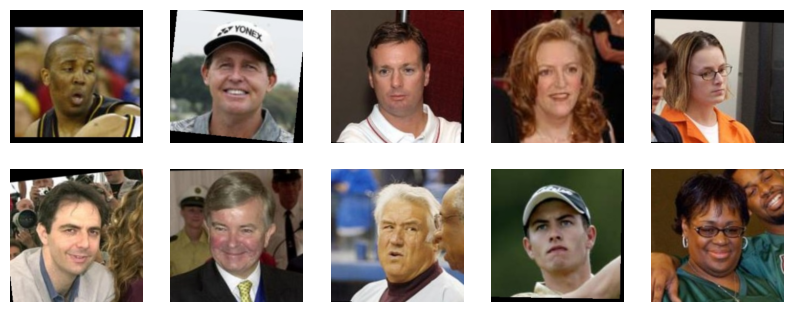

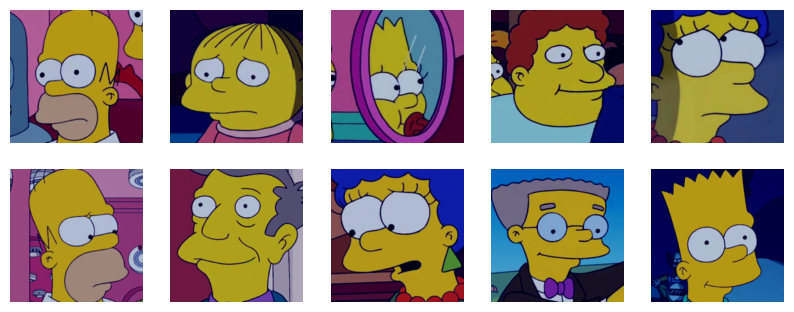

In [63]:
inv_transformation_face = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = ([1/s for s in faces_std])),
                                                transforms.Normalize(mean = [ -m for m in faces_mean ],
                                                                    std = [ 1., 1., 1. ])])
inv_transformation_simp = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                         std = ([1/s for s in simp_std])),     
                                                  transforms.Normalize(mean = [ -m for m in simp_mean ],
                                                                        std = [ 1., 1., 1. ])])
                                                                        
# display 10 images
plt.figure(figsize=(10,10))
for i, batch in enumerate(faces_dataloader):
    for j in range(batch_size):
        if i*batch_size+j >=10: break
        plt.subplot(5,5,i*batch_size+j+1)
        image = inv_transformation_face(torch.Tensor(batch[j]))
        plt.imshow(image.clip(0,1).permute(1,2,0).numpy())
        plt.axis('off')
    if i*batch_size+j >=10: break
plt.show()

# display 10 images
plt.figure(figsize=(10,10))
for i, batch in enumerate(simpsons_dataloader):
    for j in range(batch_size):
        if i*batch_size+j >=10: break
        plt.subplot(5,5,i*batch_size+j+1)
        image = inv_transformation_face(torch.Tensor(batch[j]))
        plt.imshow(image.clip(0,1).permute(1,2,0).numpy())
        plt.axis('off')
    if i*batch_size+j >=10: break
plt.show()

In [57]:
###############################################################################
# Models
###############################################################################
class DoubleConv(nn.Module):
  def __init__(self, input_channels: int, output_channels: int):
    """Initialize the DownSampleBlock class.
      
    Parameters:
      input_size (int) -- input size to block
      input_channels (int) -- #channels into first layer in block
      output_channels (int) -- #channels each layer produces
    """
    super().__init__()
    conv1 = nn.Conv2d(in_channels=input_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)
    conv2 = nn.Conv2d(in_channels=output_channels, out_channels=output_channels, kernel_size=3, stride=1, padding=1)

    nn.init.normal_(conv1.weight, mean=0.0, std= (2/(9*input_channels))**(1/2)) #sqrt(2/N)
    nn.init.normal_(conv2.weight, mean=0.0, std= (2/(9*output_channels))**(1/2)) 
    
    self.conv = nn.Sequential(conv1, nn.BatchNorm2d(output_channels), nn.ReLU(),
                              conv2, nn.BatchNorm2d(output_channels), nn.ReLU())
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.conv(x)

class DownSampleBlock(nn.Module):
  """
  DownSampling block in UNET

  MaxPool, DoubleCov
  MaxPool, Conv, BatchNorm, ReLU, Conv, BatchNorm, ReLU
  """
  def __init__(self, input_channels: int, output_channels: int):
    """Initialize the DownSampleBlock class.

    Parameters:
      input_size (int) -- input size to block
      input_channels (int) -- #channels into first layer in block
      output_channels (int) -- #channels each layer produces
    """
    super().__init__()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    self.conv = DoubleConv(input_channels, output_channels)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.conv(self.max_pool(x))

class UpSampleBlock(nn.Module):
  """
  UpSampling block in UNET

  Upsample, Conv, Concat, Conv, ReLU, Conv, ReLU
  """
  def __init__(self, input_channels: int, output_channels: int):
    """Initialize the DownSampleBlock class.
    
    Parameters:
      input_size (int) -- input size to block
      input_channels (int) -- #channels into first layer in block
      output_channels (int) -- #channels each layer produces
    """
    super().__init__()
    self.up_sample = nn.ConvTranspose2d(input_channels, output_channels, kernel_size=2, stride=2)
    self.conv = DoubleConv(input_channels, output_channels)

  def forward(self, x: torch.Tensor, res: torch.Tensor) -> torch.Tensor:
    """Forward pass for DownSampleBlock.

     Parameters:
      x (torch.Tensor) -- input tensor to block
      res (torch.Tensor) -- residual connection feeding into block
    
    Return x
    x will be used as the input to the next upsizing block (or final layer)
    """
    x = self.up_sample(x)
    # size_diff1 = (res.shape[2]-x.shape[2])//2
    # size_diff2 = (res.shape[2]-x.shape[2]) - size_diff1
    # x = torch.concat((x, res[:, :, size_diff1:-size_diff2, size_diff1:-size_diff2]), dim = 1)
    x = torch.cat((x, res), dim = 1)
    x = self.conv(x)
    return x

class UNET(nn.Module):
  def __init__(self, channels_in = 3):
    """Initialize the DownSampleBlock class.
    
    Parameters:
      channels_in (int) -- input images channel size
    """
    super().__init__()
    self.first_conv = DoubleConv(channels_in, 64)
    self.downsample_blocks = nn.ModuleList([DownSampleBlock(c, 2*c) for c in [64, 128, 256, 512]])
    self.upsample_blocks = nn.ModuleList([UpSampleBlock(2*c, c) for c in [512, 256, 128, 64]])
    self.final_layer = nn.Conv2d(in_channels=64, out_channels=channels_in, kernel_size=1, stride=1, padding=0)
    self.tanh = nn.Tanh()
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """Forward pass for DownSampleBlock.

     Parameters:
      x (torch.Tensor) --input tensor to block
      targets (torch.Tensor) --target output of model

    Returns (logits, loss)

    logits (torch.Tensor) --model's raw output
    loss (torch.float32) --2d CrossEntropyLoss result
    """
    x = self.first_conv(x)
    residuals = []
    for downsample in self.downsample_blocks:
      residuals.append(x)
      x = downsample(x)
    for i, upsample in enumerate(self.upsample_blocks):
      x = upsample(x, residuals[-(i+1)])
    x = self.final_layer(x)
    return self.tanh(x)
  
class Discriminator(nn.Module):
    """Discriminator network with PatchGAN."""
    def __init__(self, 
                input_channels: int = 3):
        super().__init__()

        self.conv1 = nn.Conv2d(input_channels, 64, 4, 2, 1)
        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 4, 2, 1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, 4, 2, 1)
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 1, 4, 1, 0)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()
        self.flatten = nn.Flatten()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.leaky_relu(self.conv1(x))
        x = self.leaky_relu(self.bn2(self.conv2(x)))
        x = self.leaky_relu(self.bn3(self.conv3(x)))
        x = self.leaky_relu(self.bn4(self.conv4(x)))
        x = self.sigmoid(self.conv5(x))
        x = self.flatten(x)
        return torch.mean(x, dim=1)


input = torch.randn(5, 3, 256, 256)
D = Discriminator()
print(D(input).shape)

x = torch.randn(5, 3, 256, 256)
model = UNET()
print(model(x)[0].shape)

torch.Size([5])
torch.Size([3, 256, 256])


In [60]:
# # New Discrimintaor and Generator
# #### Discriminator ####
# class Block(nn.Module):
#     def __init__(self, in_channels, out_channels, stride):
#         super().__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, 4, stride, 1, bias=True, padding_mode='reflect'),
#             nn.InstanceNorm2d(out_channels),
#             nn.LeakyReLU(0.2))
#     def forward(self, x):
#         return self.conv(x)

# class Discriminator(nn.Module):
#     def __init__(self, in_channels=3, features = [64, 128, 256, 512]):
#         super().__init__()
#         self.initial = nn.Sequential(
#             nn.Conv2d(in_channels, features[0], 4, 2, 1, bias=True, padding_mode='reflect'),
#             nn.LeakyReLU(0.2))
#         layers = []
#         in_channels = features[0]
#         for feature in features[1:]:
#             layers.append(Block(in_channels, feature, 1 if feature == features[-1] else 2))
#             in_channels = feature
#         layers.append(nn.Conv2d(in_channels, 1, 4, 1, 1, bias=True, padding_mode='reflect'))
#         self.model = nn.Sequential(*layers)
#     def forward(self, x):
#         x = self.initial(x)
#         return torch.sigmoid(self.model(x))

# x = torch.randn(5, 3, 256, 256)
# D = Discriminator()
# print(D(x).shape)


# class ConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, down=True, use_act=True, **kwargs):
#         super().__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, bias=True, padding_mode='reflect', **kwargs) 
#             if down 
#             else nn.ConvTranspose2d(in_channels, out_channels, bias=True, **kwargs),
#             nn.InstanceNorm2d(out_channels),
#             nn.ReLU(inplace=True) if use_act else nn.Identity())
#     def forward(self, x):
#         return self.conv(x)

# class ResidualBlock(nn.Module):
#     def __init__(self, channels):
#         super().__init__()
#         self.block = nn.Sequential(
#             ConvBlock(channels, channels, kernel_size=3, padding=1),
#             ConvBlock(channels, channels, use_act=False, kernel_size=3, padding=1))

#     def forward(self, x):
#         return x + self.block(x)

# class Generator(nn.Module):
#     def __init__(self, img_channels, num_features=64, num_residuals=9):
#         super().__init__()
#         self.initial = nn.Sequential(
#             nn.Conv2d(img_channels, 64, 7, 1, 3, bias=True, padding_mode='reflect'),
#             nn.InstanceNorm2d(64),
#             nn.ReLU(inplace=True))

#         self.down_blocks = nn.ModuleList([
#             ConvBlock(num_features, num_features*2, kernel_size=3, stride=2, padding=1),
#             ConvBlock(num_features*2, num_features*4, kernel_size=3, stride=2, padding=1)])
        
#         self.residual_blocks = nn.Sequential(*[ResidualBlock(num_features*4) for _ in range(num_residuals)])

#         self.up_blocks = nn.ModuleList([
#             ConvBlock(num_features*4, num_features*2, down=False, kernel_size=3, stride=2, padding=1, output_padding=1),
#             ConvBlock(num_features*2, num_features, down=False, kernel_size=3, stride=2, padding=1, output_padding=1)])


#         self.last = nn.Conv2d(num_features, img_channels, 7, 1, 3, bias=True, padding_mode='reflect')

#     def forward(self, x):
#         x = self.initial(x)
#         for down_block in self.down_blocks:
#             x = down_block(x)
#         x = self.residual_blocks(x)
#         for up_block in self.up_blocks:
#             x = up_block(x)
#         return torch.tanh(self.last(x))
        

# x = torch.randn(5, 3, 256, 256)
# G = Generator(3)
# print(G(x).shape)

# #number of parameters
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# count_parameters(G), count_parameters(D)

In [61]:
G = UNET().to(device)
F = UNET().to(device)

D_y = Discriminator().to(device)
D_x = Discriminator().to(device)

faces = next(iter(faces_dataloader)).to(device)
simpsons = next(iter(simpsons_dataloader)).to(device)

print(faces.shape, simpsons.shape)
print(G(faces).shape, F(simpsons).shape)
print(D_y(faces).shape, D_y(G(faces)).shape)
print(D_x(simpsons).shape, D_x(F(simpsons)).shape)

/home/fsuser/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/home/fsuser/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current d

torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])
torch.Size([1, 1, 30, 30]) torch.Size([1, 1, 30, 30])
torch.Size([1, 1, 30, 30]) torch.Size([1, 1, 30, 30])


Generating fake simpsons images (from faces)...


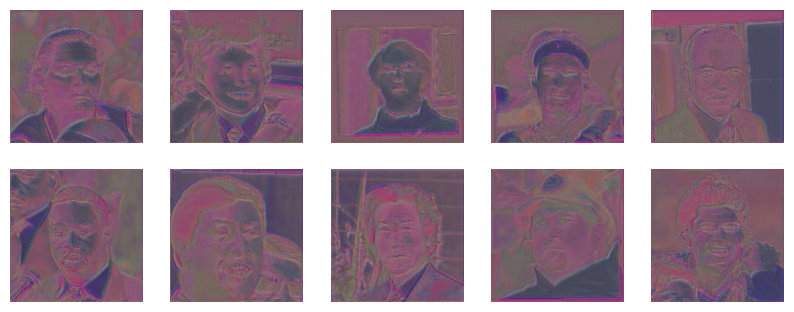

Generating fake faces images (from simpsons)...


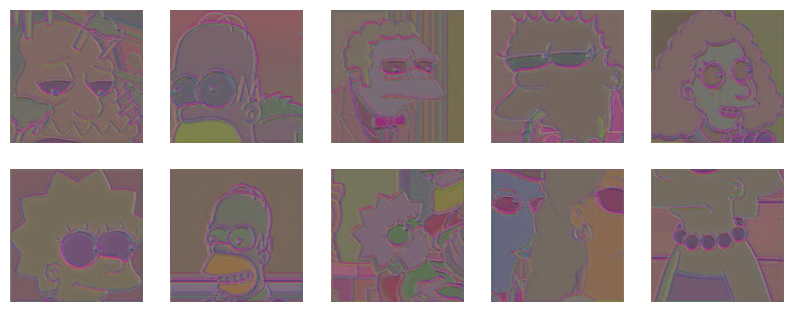

In [64]:
def display_generated_images(G, F):
    print("Generating fake simpsons images (from faces)...")
    # display 10 images
    plt.figure(figsize=(10,10))
    for i, batch in enumerate(faces_dataloader):
        pred_images = G(batch.to(device)).cpu().detach()
        for j in range(batch_size):
            if i*batch_size+j >=10: break 
            plt.subplot(5,5,i*batch_size+j+1)
            image = inv_transformation_face(pred_images[j])
            plt.imshow(image.clip(0,1).permute(1,2,0).numpy())
            plt.axis('off')
        if i*batch_size+j >=10: break 
    plt.show()

    print("Generating fake faces images (from simpsons)...")
    # display 10 images
    plt.figure(figsize=(10,10))
    for i, batch in enumerate(simpsons_dataloader):
        pred_images = F(batch.to(device)).cpu().detach()
        for j in range(batch_size):
            if i*batch_size+j >=10: break 
            plt.subplot(5,5,i*batch_size+j+1)
            image = inv_transformation_face(pred_images[j])
            plt.imshow(image.clip(0,1).permute(1,2,0).numpy())
            plt.axis('off')
        if i*batch_size+j >=10: break 
    plt.show()

def zero_all_grads():
    G.zero_grad()
    F.zero_grad()
    D_y.zero_grad()
    D_x.zero_grad()

display_generated_images(G, F)

In [65]:
class Config():
    "Can store this data in a different file instead of class"
    def __init__(self):
        self.lr = 0.0002
        self.epochs = 100
        self.batch_size = 16
        self.LOAD_MODEL = False

config = Config()

config.lr

0.0002

In [15]:
################## Hyperparameters ##################
epochs = 50
milestones = [25, 30, 35, 40, 45]
learning_rate = 0.0002

l1_loss_fn = nn.L1Loss()
l2_loss_fn = nn.MSELoss()

################## Training loop ##################
G_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate, betas=(0.5, 0.999))
F_optimizer = torch.optim.Adam(F.parameters(), lr=learning_rate, betas=(0.5, 0.999))
D_y_optimizer = torch.optim.Adam(D_y.parameters(), lr=learning_rate, betas=(0.5, 0.999))
D_x_optimizer = torch.optim.Adam(D_x.parameters(), lr=learning_rate, betas=(0.5, 0.999))

#condense into one
G_scheduler = torch.optim.lr_scheduler.MultiStepLR(G_optimizer, milestones=milestones, gamma=0.1)
F_scheduler = torch.optim.lr_scheduler.MultiStepLR(F_optimizer, milestones=milestones, gamma=0.1)
D_y_scheduler = torch.optim.lr_scheduler.MultiStepLR(D_y_optimizer, milestones=milestones, gamma=0.1)
D_x_scheduler = torch.optim.lr_scheduler.MultiStepLR(D_x_optimizer, milestones=milestones, gamma=0.1)

if config.LOAD_MODEL:
    pass
    #load_checkpoint()

t_interval = time.time()
t_start = time.time()
for epoch in range(epochs):
    t_epoch = time.time()
    for batch_idx, (faces, simpsons) in enumerate(zip(faces_dataloader, simpsons_dataloader)):
        B, C, H, W = faces.shape
        faces, simpsons = faces.to(device), simpsons.to(device)
        real_labels = torch.ones(B).to(device)
        fake_labels = torch.zeros(B).to(device)

        ########## Train Discriminators Y ##########
        #Minimizing adversarial loss
        
        ## D_y ##
        #Minimizing D_y for (D_y(x) - 1)^2 + (D_y(G(x)) - 0)^2
        simpsons_generated = G(faces)
        simpsons_pred_real = D_y(simpsons)
        simpsons_pred_fake = D_y(simpsons_generated)
        D_y_loss = l2_loss_fn(simpsons_pred_real, real_labels) + l2_loss_fn(simpsons_pred_fake, fake_labels)
        zero_all_grads()
        D_y_loss.backward()
        D_y_optimizer.step()

        ## D_x ##
        #Minimizing D_y for (D_x(x) - 1)^2 + (D_x(G(x)) - 0)^2
        faces_generated = F(simpsons)
        faces_pred_real = D_y(faces)
        faces_pred_fake = D_y()
        D_x_loss = l2_loss_fn(faces_pred_real, real_labels) + l2_loss_fn(faces_pred_fake, fake_labels)
        zero_all_grads()
        D_x_loss.backward()
        D_x_optimizer.step()
        
        ########## Train Generators ############
       
        ## G ##
        #Minimizing G for (D_y(G(x)) - 1)^2
        generated_images_g = G(faces) # would normally use random noise here instead of faces
        pred_labels_g = D_y(generated_images_g)
        generator_loss_g = l2_loss_fn(pred_labels_g, real_labels)

        #Cycle consistency loss
        generated_images_g_f = F(generated_images_g)
        cycle_consistency_loss_g = l1_loss_fn(generated_images_g_f, faces)
        
        loss_g = generator_loss_g + cycle_consistency_loss_g
        zero_all_grads()
        loss_g.backward()
        G_optimizer.step()

        ## F ##
        #Minimizing F for (D_x(F(x)) - 1)^2
        generated_images_f = F(simpsons)
        pred_labels_f = D_x(generated_images_f)
        generator_loss_f = l2_loss_fn(pred_labels_f, real_labels)

        #Cycle consistency loss
        generated_images_f_g = G(generated_images_f)
        cycle_consistency_loss_f = l1_loss_fn(generated_images_f_g, simpsons)

        loss_f = generator_loss_f + cycle_consistency_loss_f
        zero_all_grads()
        loss_f.backward()
        F_optimizer.step()

        # if batch_idx % 200 == 0:
        #     print(f"Epoch [{epoch}/{epochs}] Batch {batch_idx}/{len(faces_dataloader)} \
        #           Loss D_y: {D_y_loss:.4f}, Loss D_x: {D_x_loss:.4f} loss G: {loss_g:.4f}, loss F: {loss_f:.4f} | lr:{G_scheduler.get_last_lr()} | interval time {time.time()-t_interval:.4f}s")
        #     t_interval = time.time()
        #     display_generated_images(G, F)
    # print(f"Epoch [{epoch}/{epochs}] time taken: {time.time()-t_epoch:.4f}s, total elapsed: {time.time()-t_start:.4f}s")
    
    G_scheduler.step()
    F_scheduler.step()
    D_y_scheduler.step()
    D_x_scheduler.step()

    print(f"Epoch [{epoch}/{epochs}] Batch {batch_idx}/{len(faces_dataloader)} \
            Loss D_y: {D_y_loss:.4f}, Loss D_x: {D_x_loss:.4f} loss G: {loss_g:.4f}, loss F: {loss_f:.4f} | lr:{G_scheduler.get_last_lr()} | epoch time {time.time()-t_epoch:.4f}s, total elapsed: {time.time()-t_start:.4f}s ")
    display_generated_images(G, F)
    

1 batch trained
1 batch trained
1 batch trained
1 batch trained
1 batch trained


KeyboardInterrupt: 

In [ ]:
#I 

In [18]:
!mkdir models
torch.save(G.state_dict(), "models/G.pth")
import shutil
shutil.make_archive("G1", 'zip', "models")

'/content/G1.zip'

In [ ]:
# # upload zip to google drive
# from google.colab import drive
# drive.mount('/content/gdrive')
# !cp /content/G. /content/gdrive/MyDrive/AIData/vesuvius1.zip

# %%time
# ## Retrieve data(zip) from google drive, unzip and store locally
# from google.colab import drive
# drive.mount('/content/gdrive')
# !cp /content/gdrive/MyDrive/AIData/vesuvius1.zip /content/vesuvius1.zip 

# drive.flush_and_unmount()

In [19]:
!ls

G1.zip	      lfw-funneled.tgz	pairsDevTrain.txt  simpsons-faces.zip
G1.zip.zip    lfwpeople.zip	pairs.txt
G.pth	      models		sample_data
lfw_funneled  pairsDevTest.txt	simpsons-data


In [22]:
with zipfile.ZipFile("G1.zip","r") as zip_ref:
    zip_ref.extractall("pretrained-model")

In [24]:
!ls pretrained-model

G.pth


In [29]:
pretrained_G = UNET().to(device)
pretrained_G.load_state_dict(torch.load("pretrained-model/G.pth"))

<All keys matched successfully>

Generating fake simpsons images (from faces)...


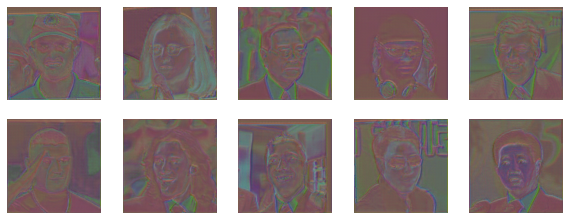

Generating fake faces images (from simpsons)...


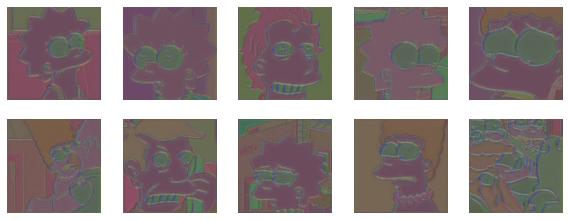

In [30]:
display_generated_images(pretrained_G, pretrained_G)